In [ ]:
import tidalapi

# Conectar a Tidal
session = tidalapi.Session()
print("Ve a la URL e inicia sesión:", session.login_oauth_simple())

# Espera a que el usuario complete la autenticación y presione Enter
input("Presiona Enter una vez completada la autenticación...")

# Lista de canciones a agregar
canciones = [
    {"titulo": "Song Title 1", "artista": "Artist Name 1"},
    {"titulo": "Song Title 2", "artista": "Artist Name 2"},
    # Agrega más canciones aquí
]

# Crear una nueva playlist
nombre_playlist = "Mi Nueva Playlist en Tidal"
usuario = session.user
playlist = usuario.create_playlist(nombre_playlist, "Playlist creada a partir de nombres de canciones")

# Buscar cada canción en Tidal y añadir a la playlist
for cancion in canciones:
    resultados = session.search(cancion["titulo"], models=[tidalapi.models.Track])
    tracks = [track for track in resultados.tracks if cancion["artista"].lower() in track.artist.name.lower()]

    if tracks:
        track_id = tracks[0].id
        playlist.add([track_id])
        print(f"Canción '{cancion['titulo']}' de '{cancion['artista']}' añadida a la playlist.")
    else:
        print(f"Canción '{cancion['titulo']}' de '{cancion['artista']}' no encontrada.")

print("Playlist creada exitosamente.")


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Configura tus credenciales de Spotify
client_id = '9c4485a6687442ceaa445c74553e802f'
client_secret = 'TU_CLIENT_SECRET'
playlist_id = '7d9zASbGTYmAnyy1RiacJK'  # ID de la playlist

# Autenticación con Spotify
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Obtener canciones de la playlist
canciones = []
results = sp.playlist_tracks(playlist_id)
for item in results['items']:
    track = item['track']
    canciones.append({
        "titulo": track['name'],
        "artista": track['artists'][0]['name']
    })

print("Canciones extraídas:", canciones)


SpotifyOauthError: error: invalid_client, error_description: Invalid client

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="9c4485a6687442ceaa445c74553e802f",
                                               client_secret="", # dgijaidsaijdjas 
                                               redirect_uri="http://localhost:8888/callback",
                                               scope="playlist-read-private",
                                               open_browser=True))


## ARRANCAMO CON LA MAGIA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [16]:
# Cargar el conjunto de datos de Iris
iris = datasets.load_iris()
X = iris.data[:5]  # Características
y = iris.target[:5]  # Etiquetas (clases)

X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Maneras de Estandizar

#### 1. Forma BOT

In [22]:


# Calcular la media y desviación estándar
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

# Reemplazar std 0 con 1 para evitar división por cero
X_std[X_std == 0] = 1

# Estandarizar los datos
X_scaled = (X - X_mean) / X_std

# Mostrar los datos escalados
X_scaled



array([[ 1.29399328,  0.95025527,  0.        ,  0.        ],
       [ 0.21566555, -1.2094158 ,  0.        ,  0.        ],
       [-0.86266219, -0.34554737, -1.58113883,  0.        ],
       [-1.40182605, -0.77748158,  1.58113883,  0.        ],
       [ 0.75482941,  1.38218948,  0.        ,  0.        ]])

#### 2. Forma PRO

In [23]:
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)
X_standardized

array([[ 1.29399328,  0.95025527,  0.        ,  0.        ],
       [ 0.21566555, -1.2094158 ,  0.        ,  0.        ],
       [-0.86266219, -0.34554737, -1.58113883,  0.        ],
       [-1.40182605, -0.77748158,  1.58113883,  0.        ],
       [ 0.75482941,  1.38218948,  0.        ,  0.        ]])

### Aca calculamos la matriz de covarianza y los autovalores y autovectores pero es al pedo porque fit te hace todo

In [19]:
# Calcular la matriz de covarianza
cov_matrix = np.cov(X_scaled, rowvar=False)

#cor_matrix = np.corrcoef(X_scaled, rowvar=False)

cov_matrix

array([[ 1.25      ,  0.85002412, -0.21312323,  0.        ],
       [ 0.85002412,  1.25      , -0.17073699,  0.        ],
       [-0.21312323, -0.17073699,  1.25      ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [15]:
# Calcular valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues

#

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

### No hace falta que haga la matriz de covarianza como ya tengo la matriz estandarizada directamente aplico 

In [24]:
# Realizar PCA
pca = PCA()
pca.fit(X_standardized)

PCA()

### Testeamos si puede aplicar el Metodo Kaiser 



In [ ]:
# Aplicar el método de Kaiser
kaiser_criteria = eigenvalues > 1  # Compara cada valor propio con 1
n_components_kept = np.sum(kaiser_criteria)  # Cuenta cuántos son mayores que 1

print("Componentes retenidos según el método de Kaiser:", n_components_kept)

Componentes retenidos según el método de Kaiser: 1


array([ True, False, False, False])

#### No tiene sentido aplicar el metodo kaiser porque nos quedariamos con una solo variable

In [33]:
# Ordenar los valores propios y sus vectores correspondientes
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Seleccionar los dos principales componentes
k = 2  # Número de componentes
W = eigenvectors_sorted[:, :k]

#Elige los dos vectores que corresponden a los 2 autovalores mas altos 
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [34]:
# Transformar los datos
X_pca = X_scaled.dot(W)

X_pca


array([[ 0.41830697, -1.36574242],
       [ 0.43812902,  1.03525238],
       [-1.27414524,  0.68335093],
       [ 0.39668259,  1.20819458],
       [ 0.02102668, -1.56105547]])

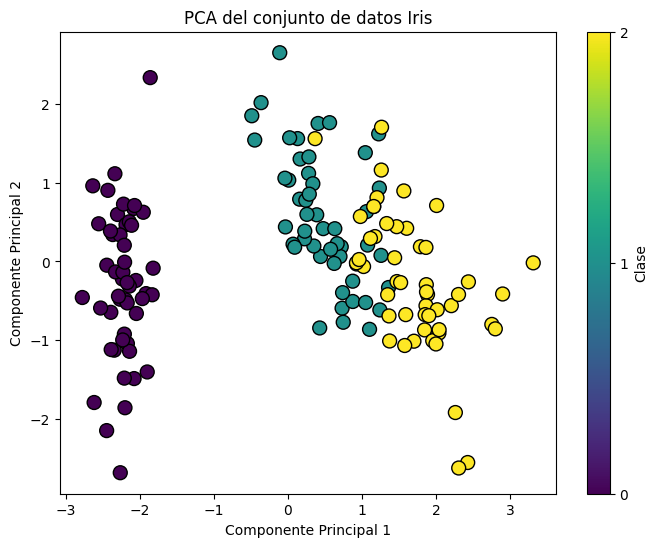

In [9]:
# Visualizar los componentes principales
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA del conjunto de datos Iris')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Clase')
plt.show()


In [35]:
# Varianza explicada por cada componente
explained_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)
print('Varianza explicada por cada componente principal:', explained_variance[:k])
print('Varianza acumulativa:', np.cumsum(explained_variance[:k]))


Varianza explicada por cada componente principal: [0.72962445 0.22850762]
Varianza acumulativa: [0.72962445 0.95813207]
